In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pandas import DataFrame
%matplotlib inline 
# read in the drinks data

path = '/users/teddyandalex/documents/data_science/'
mooc_cols = ['course_id', 'userid_di', 'registered', 'viewed', 'explored', 'certified', 'final_cc_cname_di', 'loe_di', 'yob', 'gender', 'grade', 'start_time_di', 
'last_event_di', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'incomplete_flag']
mooc = path + 'HMXPC13_DI_v2_5-14-14.csv'
mooc_data = pd.read_csv(mooc, header=0, names=mooc_cols, na_values='NAN')
mooc_data.head()

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,course_id,userid_di,registered,viewed,explored,certified,final_cc_cname_di,loe_di,yob,gender,grade,start_time_di,last_event_di,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1


In [3]:
# create age variable

mooc_data['yob'].dtype
mooc_data['new_yob']=mooc_data.yob.convert_objects(convert_numeric=True)

mooc_data['age'] = 2013 - mooc_data['new_yob']

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [4]:
mooc_data['outcome']=''

mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 0),'outcome']=1
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 0),'outcome']=2
mooc_data.loc[(mooc_data['viewed'] == 0) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 0),'outcome']=2
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 1),'outcome']=3
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 1),'outcome']=3
mooc_data.loc[(mooc_data['viewed'] == 0) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 0),'outcome']=0

counts = mooc_data['outcome'].value_counts(sort = False)  
print counts

0    240868
1    359894
2     22689
3     17687
Name: outcome, dtype: int64


In [5]:
# look at courses
mooc_data.course_id.value_counts()   
cs50 = mooc_data.loc[mooc_data.course_id == "HarvardX/CS50x/2012"]
# Look at class interaction variables
 #'start_time_di', 'last_event_di', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'time_elapse',  

cs50.describe()


,registered,viewed,explored,certified,yob,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,new_yob,age
count,169621,169621.000000,169621.000000,169621.000000,149828.000000,49680.000000,58306.00000,0,106489.000000,169621,0,68862,149828.000000,149828.000000
mean,1,0.625430,0.064986,0.007588,1984.892604,39.547806,4.31784,NaN,2.565598,0,NaN,1,1984.892604,28.107396
std,0,0.484013,0.246502,0.086775,9.081319,89.655333,8.26345,NaN,2.768481,0,NaN,0,9.081319,9.081319
min,1,0.000000,0.000000,0.000000,1935.000000,1.000000,1.00000,NaN,1.000000,0,NaN,1,1935.000000,0.000000
25%,1,0.000000,0.000000,0.000000,1981.000000,3.000000,1.00000,NaN,1.000000,0,NaN,1,1981.000000,22.000000
50%,1,1.000000,0.000000,0.000000,1987.000000,10.000000,2.00000,NaN,1.000000,0,NaN,1,1987.000000,26.000000
75%,1,1.000000,0.000000,0.000000,1991.000000,31.000000,3.00000,NaN,3.000000,0,NaN,1,1991.000000,32.000000
max,1,1.000000,1.000000,1.000000,2013.000000,3491.000000,176.00000,NaN,12.000000,0,NaN,1,2013.000000,78.000000


In [6]:
#run model on CS50 course dataset
from pandas import DataFrame

from sklearn.cluster import KMeans
#preprocessing
#replace NaNs to 0s

list = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']
#for what in range(0,5):
    #print list[what]
    #print cs50[list[what]].value_counts()


In [7]:
list2 = ['nevents', 'ndays_act', 'nchapters']
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 0),'outcome']=1
for what in range(0,len(list2)):
    cs50[list2[what]].fillna(0, inplace = True)
      
for what in range(0,len(list2)):
    print pd.isnull(cs50[list2[what]]).value_counts()

#converting variables into z-scores
from sklearn import preprocessing
listz = ['znevents', 'zndays_act', 'znchapters']
for what in range(0,len(listz)):
    cs50[listz[what]] = preprocessing.scale(cs50[list2[what]])

for X in range(0, len(listz)):
    print cs50[listz[X]].describe()

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False    169621
Name: nevents, dtype: int64
False    169621
Name: ndays_act, dtype: int64
False    169621
Name: nchapters, dtype: int64
count    1.696210e+05
mean     5.007667e-14
std      1.000003e+00
min     -2.238250e-01
25%     -2.238250e-01
50%     -2.238250e-01
75%     -1.851781e-01
max      6.723427e+01
Name: znevents, dtype: float64
count    1.696210e+05
mean     2.631122e-14
std      1.000003e+00
min     -2.821211e-01
25%     -2.821211e-01
50%     -2.821211e-01
75%     -9.204155e-02
max      3.317187e+01
Name: zndays_act, dtype: float64
count    1.696210e+05
mean    -3.472878e-14
std      1.000003e+00
min     -6.391946e-01
25%     -6.391946e-01
50%     -2.423511e-01
75%      1.544925e-01
max      4.122928e+00
Name: znchapters, dtype: float64


In [8]:
cs50.head()

,course_id,userid_di,registered,viewed,explored,certified,final_cc_cname_di,loe_di,yob,gender,...,nchapters,nforum_posts,roles,incomplete_flag,outcome,new_yob,age,znevents,zndays_act,znchapters
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,...,1,0,NaN,1,1,NaN,NaN,-0.223825,1.428594,-0.242351
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,0,0,NaN,1,0,NaN,NaN,-0.223825,2.759151,-0.639195
9,HarvardX/CS50x/2012,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,3,0,NaN,1,1,NaN,NaN,-0.223825,1.998833,0.551336
13,HarvardX/CS50x/2012,MHxPC130024894,1,1,0,0,United States,NaN,NaN,NaN,...,2,0,NaN,1,1,NaN,NaN,-0.223825,0.098038,0.154492
17,HarvardX/CS50x/2012,MHxPC130080986,1,1,0,0,United States,NaN,NaN,NaN,...,1,0,NaN,1,1,NaN,NaN,-0.223825,1.808753,-0.242351


In [119]:
#Run kmeans model
from sklearn.cluster import KMeans
feature_cols = ['znevents', 'zndays_act', 'znchapters']
X = cs50[feature_cols]
k_means = KMeans(n_clusters=3)
k_means.fit(X)
labels = k_means.labels_
iner = k_means.inertia_
centroids = k_means.cluster_centers_
pd.value_counts(labels)
cs50['Cluster_labels'] = pd.Series(labels, index=cs50.index)



/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
cs50.describe()

,registered,viewed,explored,certified,yob,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,new_yob,age,znevents,zndays_act,znchapters,Cluster_labels
count,169621,169621.000000,169621.000000,169621.000000,149828.000000,169621.000000,169621.000000,0,169621.000000,169621,0,68862,149828.000000,149828.000000,1.696210e+05,1.696210e+05,1.696210e+05,169621.000000
mean,1,0.625430,0.064986,0.007588,1984.892604,11.583088,1.484227,NaN,1.610697,0,NaN,1,1984.892604,28.107396,5.007667e-14,2.631122e-14,-3.472878e-14,0.228680
std,0,0.484013,0.246502,0.086775,9.081319,51.750798,5.260972,NaN,2.519892,0,NaN,0,9.081319,9.081319,1.000003e+00,1.000003e+00,1.000003e+00,0.760582
min,1,0.000000,0.000000,0.000000,1935.000000,0.000000,0.000000,NaN,0.000000,0,NaN,1,1935.000000,0.000000,-2.238250e-01,-2.821211e-01,-6.391946e-01,0.000000
25%,1,0.000000,0.000000,0.000000,1981.000000,0.000000,0.000000,NaN,0.000000,0,NaN,1,1981.000000,22.000000,-2.238250e-01,-2.821211e-01,-6.391946e-01,0.000000
50%,1,1.000000,0.000000,0.000000,1987.000000,0.000000,0.000000,NaN,1.000000,0,NaN,1,1987.000000,26.000000,-2.238250e-01,-2.821211e-01,-2.423511e-01,0.000000
75%,1,1.000000,0.000000,0.000000,1991.000000,2.000000,1.000000,NaN,2.000000,0,NaN,1,1991.000000,32.000000,-1.851781e-01,-9.204155e-02,1.544925e-01,0.000000
max,1,1.000000,1.000000,1.000000,2013.000000,3491.000000,176.000000,NaN,12.000000,0,NaN,1,2013.000000,78.000000,6.723427e+01,3.317187e+01,4.122928e+00,3.000000


In [31]:
# determining optimal number of clusters
from sklearn.cluster import KMeans
k_range = range(1,3)

def k_var(xv,kran):
    kiner_tuple = []
    kiner_perc = []
    for kr in kran:
        k_means = KMeans(n_clusters = kr)
        k_means.fit(xv)
        iner = k_means.inertia_
        #perc = iner/tss
        kiner_tuple.append((kr,iner))
        #kiner_perc.append(perc)
        print kr
        #print perc
    return kiner_tuple
    
k_tup = k_var(X,k_range)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [32]:
print k_tup

[(1, 508862.99999999988), (2, 260991.87892762126), (3, 167809.26784937241), (4, 135888.78853677819), (5, 111923.40232998632), (6, 95722.760444308369), (7, 82229.994751948208), (8, 72076.092357941423), (9, 64814.679652792991), (10, 59354.94271435542), (11, 55226.187830071933), (12, 51456.091260009292), (13, 47742.842074047388), (14, 44412.025752833142), (15, 41503.940984690678), (16, 38966.916554521318), (17, 36983.65297980691), (18, 35239.782663305225), (19, 33548.834604829441)]


In [9]:
#graph total within cluster variance by # of clusters
#Plot this to find point where marginal gain in variance explains drops (elbow)
import matplotlib.pyplot as plt

r = []
s = []
for km, ss in k_tup:
    r.append(km)
    s.append(ss)

plt.title('Determining optimal # of clusters')
plt.ylabel('Total within-cluster sum of squares')
plt.xlabel('Number of clusters')
plt.scatter(r, s, linewidths = 1)
plt.plot(r,s,'.g')



NameError: name 'k_tup' is not defined

In [ ]:
# use silouette scores: average distance between points within cluster as compared to average distance 
#between points in cluster to points in nearest cluster
from sklearn.metrics import silhouette_samples, silhouette_score
    
silhouette_avg = silhouette_score(X, labels)

In [125]:
#Set variables for plot

rkm = cs50['Cluster_labels']
x=cs50['znevents']
y=cs50['zndays_act']
z=cs50['znchapters']
list = [x,y,z]

cs50['Cluster_labels'].value_counts()
cs50['outcome'].value_counts(sort = False)

0    63535
1    95058
2     9741
3     1287
Name: outcome, dtype: int64

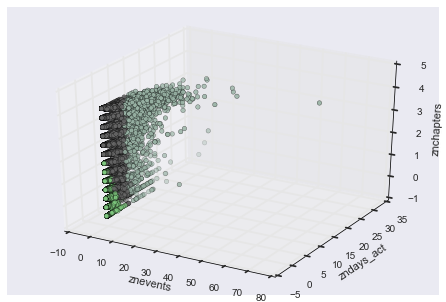

In [121]:
#plot CS50 Kmeans results - 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
print ax.scatter(x,y,z, c=rkm, cmap=plt.cm.Accent)


In [124]:
#characterize kmeans groups

#cs50.nevents.groupby('Cluster_labels').mean()
list = ['nevents', 'ndays_act', 'nchapters']
for X in range(0,len(list)):
    print list[X]
    print cs50[list[X]].groupby(cs50['Cluster_labels']).mean()
    


nevents
Cluster_labels
0      3.197771
1    349.726592
2     67.176421
Name: nevents, dtype: float64
ndays_act
Cluster_labels
0     0.616364
1    37.432584
2     7.047458
Name: ndays_act, dtype: float64
nchapters
Cluster_labels
0     1.013091
1    10.169476
2     8.685988
Name: nchapters, dtype: float64


In [87]:
#create survival function
%matplotlib inline 
chapters = cs50['nchapters']
table1 = pd.Series.value_counts(chapters, sort = False)
print table1
sum1 = pd.Series.sum(table)
zero = 0
sum = sum1
table2 = []
for k in range(0,12):
    index_tot = (table1.ix[k:13].sum())
    per_drop = table1.ix[k]/(index_tot*1.0)
    table2.append((k,per_drop))
print table2

0     63132
1     54112
2     25093
3      8198
4      4945
5      2888
6      1536
7      1290
8       925
9       954
10     1008
11      696
12     4844
Name: nchapters, dtype: int64
[(0, 0.372194480636242), (1, 0.50814638131638012), (2, 0.47908433090860492), (3, 0.30046913942237208), (4, 0.25909043277795241), (5, 0.20422883813025952), (6, 0.13649693415089309), (7, 0.13275702377276938), (8, 0.10976622760175626), (9, 0.1271660890429219), (10, 0.15394013439218082), (11, 0.1256317689530686)]


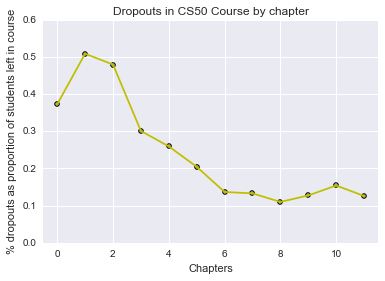

In [90]:
#plot survival function
r = []
s = []
for i,va in table2:
    r.append(i)
    s.append(va)
plt.minorticks_on()
plt.title('Dropouts in CS50 Course by chapter')
plt.ylabel('% dropouts as proportion of students left in course')
plt.xlim(xmax=11.5)
plt.xlim(xmin=-.5)
plt.xlabel('Chapters')
plt.scatter(r, s, linewidths = 1)
plt.plot(r,s,'.y',linestyle='solid')

0     63132
1     54112
2     25093
3      8198
4      4945
12     4844
5      2888
6      1536
7      1290
10     1008
9       954
8       925
11      696
Name: nchapters, dtype: int64


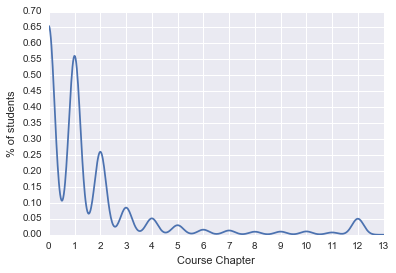

In [70]:

chapters.plot(kind='density')
plt.locator_params(nbins = 15)
plt.xlim(xmax=13)
plt.xlim(xmin=0)
plt.xlabel('Course Chapter')
plt.ylabel('% of students')
print chapters.value_counts()

In [123]:
#Prediction
#create dummies for country, female, highest degree
attr = ['final_cc_cname_di', 'gender' ,'loe_di']
for X in range(0,2):
    cs50[attr[X]].value_counts()

cs50.final_cc_cname_di.value_counts()
dummies_gender=pd.get_dummies(cs50.gender, prefix = 'gd')
cs50 = pd.concat([cs50, dummies_gender], axis = 1)

dummies_country= pd.get_dummies(cs50.final_cc_cname_di, prefix = 'cty')
cs50 = pd.concat([cs50, dummies_country], axis = 1)

dummies_deg = pd.get_dummies(cs50.loe_di, prefix = 'deg')
cs50 = pd.concat([cs50, dummies_deg], axis = 1)

print cs50.ix[:,20:].head()




    new_yob  age outcome  znevents  zndays_act  znchapters  Cluster_labels  \
1       NaN  NaN       1 -0.223825    1.428594   -0.242351               0   
3       NaN  NaN       0 -0.223825    2.759151   -0.639195               0   
9       NaN  NaN       1 -0.223825    1.998833    0.551336               0   
13      NaN  NaN       1 -0.223825    0.098038    0.154492               0   
17      NaN  NaN       1 -0.223825    1.808753   -0.242351               0   

    gd_f  gd_m  gd_o      ...        cty_Spain  cty_Ukraine  \
1      0     0     0      ...                0            0   
3      0     0     0      ...                0            0   
9      0     0     0      ...                0            0   
13     0     0     0      ...                0            0   
17     0     0     0      ...                0            0   

    cty_United Kingdom  cty_United States  cty_Unknown/Other  deg_Bachelor's  \
1                    0                  1                  0            

In [124]:
#create list for country dummies

country = cs50.final_cc_cname_di.value_counts()
listcty = []
for index, values in pd.Series.iteritems(country):
    cty1 = 'cty_' + str(index)
    listcty.append(cty1)

print listcty

['cty_Unknown/Other', 'cty_United States', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']


In [125]:
#prepare other variables for prediction
list = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", "age"]
for item in range(0,len(listcty)):
    list.append(listcty[item])
import copy
feature_cols = copy.copy(list)
list = []
print len(feature_cols)
print feature_cols
print cs50.outcome.value_counts()


for what in range(0,len(feature_cols)):
    cs50[feature_cols[what]].fillna(0, inplace = True)


41
['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
1    95058
0    63535
2     9741
3     1287
Name: outcome, dtype: int64


In [127]:
cs50.gd_f.describe()
print pd.isnull(cs50['gd_f']).value_counts

<bound method Series.value_counts of 1         False
3         False
9         False
13        False
17        False
19        False
20        False
21        False
22        False
24        False
25        False
26        False
27        False
28        False
30        False
33        False
34        False
35        False
37        False
40        False
45        False
47        False
49        False
50        False
51        False
53        False
54        False
56        False
57        False
59        False
          ...  
338151    False
338152    False
338154    False
338163    False
338165    False
338167    False
338169    False
338171    False
338173    False
338177    False
338184    False
338185    False
338187    False
338188    False
338189    False
338190    False
338191    False
338196    False
338197    False
338199    False
338201    False
338203    False
338211    False
338212    False
338214    False
338217    False
338219    False
338220    False
338221    False
338

In [68]:
#KNN Prediction - trial run
from sklearn.neighbors import KNeighborsClassifier
# make an instance of a KNeighborsClassifier object

X = cs50[feature_cols]
y = cs50['outcome']
knn = KNeighborsClassifier(n_neighbors=5)
type(knn)
knn.fit(X, y)
pred = knn.predict(X)
print X.dtypes
print y.dtype
yint=y.astype('int64')


cty_Unknown/Other                             float64
cty_United States                             float64
cty_India                                     float64
cty_Other Europe                              float64
cty_Other Africa                              float64
cty_United Kingdom                            float64
cty_Canada                                    float64
cty_Brazil                                    float64
cty_Other Middle East/Central Asia            float64
cty_Other South Asia                          float64
cty_Russian Federation                        float64
cty_Pakistan                                  float64
cty_Nigeria                                   float64
cty_Australia                                 float64
cty_Spain                                     float64
cty_Other South America                       float64
cty_Philippines                               float64
cty_Egypt                                     float64
cty_Germany                 

In [18]:
# Evaluation KNN Predictions Using Train-Test Split
#define function for 1 KNN evaluation using accuracy score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
def eval_knn(Xf, yf, rand, nn):
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_tr, y_tr)
    y_pc = knn.predict(X_te)
    met = (metrics.accuracy_score(y_te, y_pc))
    return met
eval_knn(X,yint,7, 5)

0.50358439843418379

In [19]:
#Tuning
#define function for multiple KNN evaluations, varying on n_neighbors, this time n_neighbors is an array

def eval_knn_nn(Xf, yf, rand, nnl):
    nmet_tuple = []
    for value in nnl:
        print value
        measure = eval_knn(Xf, yf, rand, value)
        nmet_tuple.append((value, measure))
    return nmet_tuple
    

In [ ]:
nnlist = np.arange(1,101)
test = eval_knn_nn(X,yint,150,nnlist)
print test


1
0.4630712635
2
0.456940055653
3
0.486110456068
4
0.484389001556
5
0.489576946658
6
0.497877658822
7
0.504999292553
8
0.510753195303
9
0.513700891383
10
0.514078196482
11
0.516625005895
12
0.51759185021
13
0.522331745508
14
0.522095929821
15
0.526930151394
16
0.527260293355
17
0.534499834929
18
0.535490260812
19
0.538249304344
20
0.540631042777
21
0.541597887091
22
0.541031929444
23
0.541244163562
24
0.541008347875
25
0.541149837287
26
0.540324482385
27
0.543932462387
28
0.544097533368
29
0.544427675329
30
0.542187426308
31
0.54388529925
32
0.542918454936
33
0.543437249446
34
0.544262604348
35
0.545913314154
36
0.546573598076
37
0.546927321605
38
0.546408527095
39
0.545394519643
40
0.548389378861
41
0.547351789841
42
0.548743102391
43
0.548884591803
44
0.549709946706
45
0.548012073763
46
0.549992925529
47
0.550016507098
48
0.553365089846
49
0.552256756119
50
0.552516153375
51
0.551879451021
52
0.552563316512
53
0.55277555063
54
0.553577323964
55
0.552539734943
56
0.552115266708
57
0.5

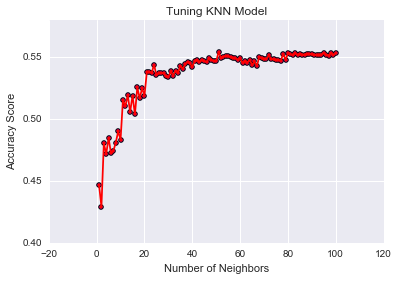

In [212]:
#plot results
import matplotlib.pyplot as plt
n = []
v = []
for neigh, val in test:
    n.append(neigh)
    v.append(val)

plt.title('Tuning KNN Model')
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Neighbors')
plt.scatter(n, v, linewidths = 1)
plt.plot(n,v,'.r-')
plt.show()


In [ ]:
'gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", "age" 

In [128]:
print len(feature_cols)
cs50.describe()
#for what in range(0,len(feature_cols)):
    #cs50[fe]
   
print pd.isnull(cs50['age']).value_counts()

    #print pd.isnull(cs50[feature_cols[what]]).value_counts()

41
False    169621
Name: age, dtype: int64


In [145]:
#Logistic  Regression Model
# fit a logistic regression model and store the class predictions
#feature_cols already defined above
from sklearn.linear_model import LogisticRegression
feature_cols1 = ['gd_f', 'deg_Doctorate', #'deg_Less than Secondary'#
                  "deg_Master's", 'deg_Secondary', "deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']

logreg = LogisticRegression()

X = cs50[feature_cols1]
y = cs50['outcome']
logreg.fit(X, y)
cs50['log_pred_class'] = logreg.predict(X)
cs50['log_pred_class'].value_counts()

1    146501
0     23120
Name: log_pred_class, dtype: int64

In [146]:
# Examine Coefficients
print feature_cols
print len(feature_cols)
zip(logreg.coef_)

['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
41


[(array([  1.57582071e-01,   4.13732882e-02,   8.39062420e-02,
          -4.80020913e-02,   1.25610818e-01,   4.83190685e-04,
           6.16257706e-01,  -1.50168273e-01,  -4.17179570e-01,
           1.19202520e-01,  -2.39972873e-01,  -9.85232956e-02,
           7.49016656e-03,   9.11737362e-02,  -6.88275654e-02,
           1.79102856e-01,   3.43826005e-01,   1.54768785e-01,
           2.15067700e-01,  -4.09007027e-01,  -1.09249610e-03,
           1.48660707e-02,   2.15684522e-01,  -3.32567750e-01,
          -2.10206194e-01,  -9.00132678e-02,  -1.33174421e-01,
          -1.84138028e-01,  -2.33602970e-01,  -1.94610438e-01,
          -4.59834794e-01,  -5.31168385e-01,  -9.68831137e-02,
           2.06535947e-01,   1.53171687e-01,   2.16053315e-01,
          -1.79977172e-01,  -3.33627791e-01,  -3.65114952e-01]),),
 (array([ -4.34772327e-02,  -5.06702288e-02,  -4.17835043e-02,
           6.62292349e-02,  -6.95359640e-02,  -6.06111598e-05,
          -4.10812111e-01,  -1.03240361e-01,   2.04

In [133]:
#evaluate model
#cross validation score - doesn't work with multiclass format
#use accuracy score
# Evaluation logistic model Using Train-Test Split and accuracy scores
from sklearn.cross_validation import train_test_split
from sklearn import metrics
def eval_log(Xf, yf, rand):
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    logreg = LogisticRegression()
    logreg.fit(X_tr, y_tr)
    y_pc = logreg.predict(X_te)
    met = (metrics.accuracy_score(y_te, y_pc))
    print metrics.accuracy_score(y_te, y_pc)
    return met
eval_log(X,yint,7)

0.559850021223


0.55985002122341176

In [137]:
print feature_cols

['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']


In [142]:
#create different versions of feature vectors and test models
feature_cols1 = ['gd_f', 'deg_Doctorate', #'deg_Less than Secondary'#
                  "deg_Master's", 'deg_Secondary', "deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
feature_cols2 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
"deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States']
feature_cols3 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
"deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_United States']
X1 = cs50[feature_cols1]
X2=cs50[feature_cols2]
X3 = cs50[feature_cols3]
eval_log(X1,yint,7)
eval_log(X2,yint,7)
eval_log(X3, yint,7)

0.559967929067
0.560203744753
0.558529453379


0.55852945337923876